In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Set visualization style
sns.set_theme(style="whitegrid")

In [4]:
def read_data(file_path, index_col=None):
    """
    Read data from CSV or Excel file and drop unnecessary columns.
    
    Returns:
    - df (DataFrame): Filtered DataFrame.
    - headers (list): List of column headers.
    """
    if file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path, index_col=index_col)
    elif file_path.endswith('.csv'):
        df = pd.read_csv(file_path, index_col=index_col)
    else:
        raise ValueError("Unsupported file format. Please provide a .csv or .xlsx file.")
    
    return df

In [5]:
file_path = "../../../data/etp-bermant.csv"

In [6]:
df = read_data(file_path, index_col= 'CodaNum')

In [7]:
print("Dataset Overview")
print(df.info())

Dataset Overview
<class 'pandas.core.frame.DataFrame'>
Index: 16995 entries, 1 to 20142930
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FullDateTime  16995 non-null  object 
 1   ClanNum       16855 non-null  float64
 2   ClanName      16855 non-null  object 
 3   NumClicks     16995 non-null  int64  
 4   TotalDur      16995 non-null  float64
 5   ICI1          16995 non-null  float64
 6   ICI2          16995 non-null  float64
 7   ICI3          16995 non-null  float64
 8   ICI4          16995 non-null  float64
 9   ICI5          16995 non-null  float64
 10  ICI6          16995 non-null  float64
 11  ICI7          16995 non-null  float64
 12  ICI8          16995 non-null  float64
 13  ICI9          16995 non-null  float64
 14  ICI10         16995 non-null  float64
 15  ICI11         16995 non-null  float64
 16  Coda Type     16993 non-null  float64
dtypes: float64(14), int64(1), object(2)
memory usage: 2.3+

In [8]:
print("Missing Values")
print(df.isnull().sum())

Missing Values
FullDateTime      0
ClanNum         140
ClanName        140
NumClicks         0
TotalDur          0
ICI1              0
ICI2              0
ICI3              0
ICI4              0
ICI5              0
ICI6              0
ICI7              0
ICI8              0
ICI9              0
ICI10             0
ICI11             0
Coda Type         2
dtype: int64


In [9]:
print("Summary Statistics")
print(df.describe(include='all'))

Summary Statistics
               FullDateTime       ClanNum ClanName     NumClicks  \
count                 16995  16855.000000    16855  16995.000000   
unique                13717           NaN        6           NaN   
top     2014-05-16 22:00:54           NaN  Regular           NaN   
freq                     12           NaN     6955           NaN   
mean                    NaN      3.180125      NaN      5.605766   
std                     NaN      2.115048      NaN      2.186366   
min                     NaN      1.000000      NaN      3.000000   
25%                     NaN      1.000000      NaN      4.000000   
50%                     NaN      2.000000      NaN      5.000000   
75%                     NaN      5.000000      NaN      7.000000   
max                     NaN      6.000000      NaN     29.000000   

            TotalDur          ICI1          ICI2          ICI3          ICI4  \
count   16995.000000  16995.000000  16995.000000  16995.000000  16995.000000   
uniq

# Time data analysis

In [10]:
def get_date(date_string: str):
    date_string = date_string.split(' ')[0]
    if date_string.find('-') == 4 :
        date_string = date_string[-2:] + '-' + date_string[5: 7] + '-' + date_string[:4]
    else:
        date_string=date_string[3:5] + '-' + date_string[:2] + '-' + date_string[-4:]
    return date_string

In [11]:
df.FullDateTime.apply(get_date)

CodaNum
1           23-02-1985
2           23-02-1985
3           23-02-1985
4           23-02-1985
5           23-02-1985
               ...    
20142926    18-05-2014
20142927    18-05-2014
20142928    18-05-2014
20142929    18-05-2014
20142930    18-05-2014
Name: FullDateTime, Length: 16995, dtype: object

In [12]:
df_with_date = df.copy()
df_with_date.FullDateTime = pd.to_datetime(df.FullDateTime.apply(get_date), dayfirst=True)

In [13]:
df_with_date_idx = df_with_date.set_index('FullDateTime')
df_with_date_idx.sort_index(inplace=True)
print("DataFrame after setting datetime index:")
df_with_date_idx.head()

DataFrame after setting datetime index:


,ClanNum,ClanName,NumClicks,TotalDur,ICI1,ICI2,ICI3,ICI4,ICI5,ICI6,ICI7,ICI8,ICI9,ICI10,ICI11,Coda Type
FullDateTime,,,,,,,,,,,,,,,,
1985-02-23,1.0,Regular,5,0.531,0.141,0.127,0.126,0.138,0.000,0.000,0.000,0.0,0.0,0.0,0.0,599.0
1985-02-23,1.0,Regular,5,1.153,0.290,0.291,0.289,0.283,0.000,0.000,0.000,0.0,0.0,0.0,0.0,599.0
1985-02-23,1.0,Regular,6,1.727,0.336,0.346,0.352,0.344,0.349,0.000,0.000,0.0,0.0,0.0,0.0,699.0
1985-02-23,1.0,Regular,5,1.150,0.297,0.288,0.286,0.279,0.000,0.000,0.000,0.0,0.0,0.0,0.0,599.0
1985-02-23,1.0,Regular,8,1.364,0.192,0.184,0.187,0.192,0.200,0.199,0.211,0.0,0.0,0.0,0.0,899.0


In [14]:
non_numeric_columns = df_with_date_idx.select_dtypes(exclude=[np.number]).columns
print("Non-Numeric Columns:", non_numeric_columns)
numeric_columns = df_with_date_idx.select_dtypes(include=[np.number]).columns
print("Numeric Columns:", numeric_columns)

Non-Numeric Columns: Index(['ClanName'], dtype='object')
Numeric Columns: Index(['ClanNum', 'NumClicks', 'TotalDur', 'ICI1', 'ICI2', 'ICI3', 'ICI4',
       'ICI5', 'ICI6', 'ICI7', 'ICI8', 'ICI9', 'ICI10', 'ICI11', 'Coda Type'],
      dtype='object')


In [15]:
df_numeric = df_with_date_idx.select_dtypes(include=[np.number])

In [16]:
df_monthly = df_numeric.resample('YE').mean().dropna()
df_monthly

,ClanNum,NumClicks,TotalDur,ICI1,ICI2,ICI3,ICI4,ICI5,ICI6,ICI7,ICI8,ICI9,ICI10,ICI11,Coda Type
FullDateTime,,,,,,,,,,,,,,,
1985-12-31,1.192094,6.798809,1.502685,0.251342,0.246791,0.240435,0.244436,0.162670,0.122503,0.082508,0.046218,0.027535,0.013962,0.008190,460.395103
1987-12-31,1.549436,6.695559,1.390068,0.233949,0.233995,0.240678,0.229367,0.171922,0.111795,0.073825,0.036413,0.020117,0.012689,0.007963,469.425032
1989-12-31,1.106195,6.469027,1.267841,0.229487,0.226398,0.226133,0.217354,0.162850,0.106372,0.058522,0.024965,0.012584,0.002080,0.001018,460.389381
1991-12-31,4.409201,4.457627,0.712826,0.201545,0.189717,0.116165,0.086058,0.062223,0.032412,0.010818,0.004881,0.002223,0.001593,0.001375,440.426150
1992-12-31,4.780389,4.112642,1.529375,0.433235,0.407432,0.237189,0.148998,0.149486,0.106122,0.028562,0.008119,0.005564,0.002734,0.001426,395.036467
1993-12-31,4.493883,5.322601,1.758992,0.389035,0.360491,0.258368,0.310551,0.210726,0.112064,0.053416,0.026381,0.016976,0.006085,0.002426,458.947809
1995-12-31,1.533333,6.463636,1.321852,0.234373,0.242836,0.228165,0.214058,0.168423,0.117445,0.064138,0.028342,0.013773,0.004052,0.002645,513.642424
1999-12-31,5.000000,5.270762,1.181028,0.230621,0.303593,0.220174,0.136412,0.100663,0.043099,0.027977,0.022064,0.016014,0.012505,0.009382,274.921502
2000-12-31,2.095301,5.144216,0.730031,0.168158,0.171399,0.151365,0.139141,0.044192,0.030306,0.019203,0.002835,0.001378,0.000623,0.000592,531.655784


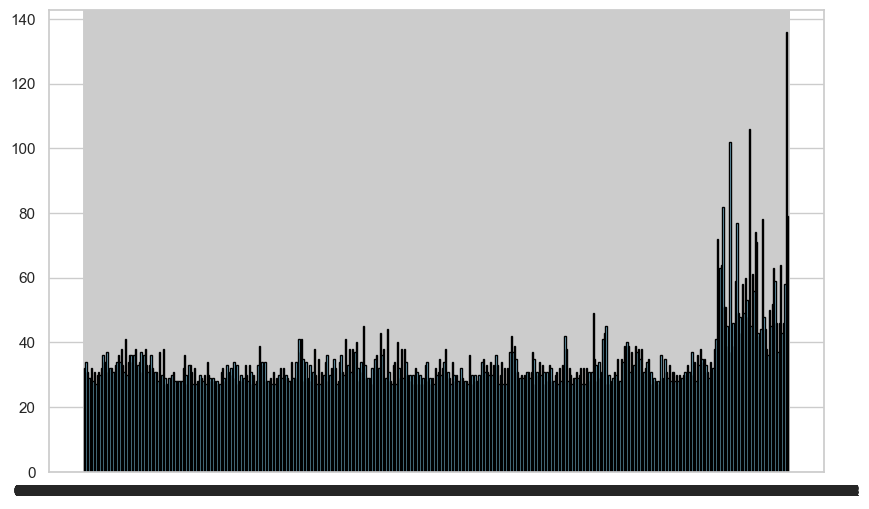

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df.FullDateTime, bins=500, color='skyblue', edgecolor='black')
plt.show()

# Numerical Data Analysis

In [20]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['ClanNum', 'NumClicks', 'TotalDur', 'ICI1', 'ICI2', 'ICI3', 'ICI4', 'ICI5', 'ICI6', 'ICI7', 'ICI8', 'ICI9', 'ICI10', 'ICI11', 'Coda Type']


In [21]:
# Summary statistics
print("Numerical Summary Statistics:\n", df[numerical_cols].describe())

Numerical Summary Statistics:
             ClanNum     NumClicks      TotalDur          ICI1          ICI2  \
count  16855.000000  16995.000000  16995.000000  16995.000000  16995.000000   
mean       3.180125      5.605766      1.087052      0.226622      0.230017   
std        2.115048      2.186366      0.885635      0.138978      0.136927   
min        1.000000      3.000000      0.076396      0.004240      0.000000   
25%        1.000000      4.000000      0.636000      0.148000      0.149000   
50%        2.000000      5.000000      0.834000      0.192000      0.197000   
75%        5.000000      7.000000      1.312500      0.276000      0.280000   
max        6.000000     29.000000     68.118000      1.544000      1.760000   

               ICI3          ICI4          ICI5          ICI6          ICI7  \
count  16995.000000  16995.000000  16995.000000  16995.000000  16995.000000   
mean       0.190764      0.171767      0.107026      0.069991      0.039985   
std        0.163043 

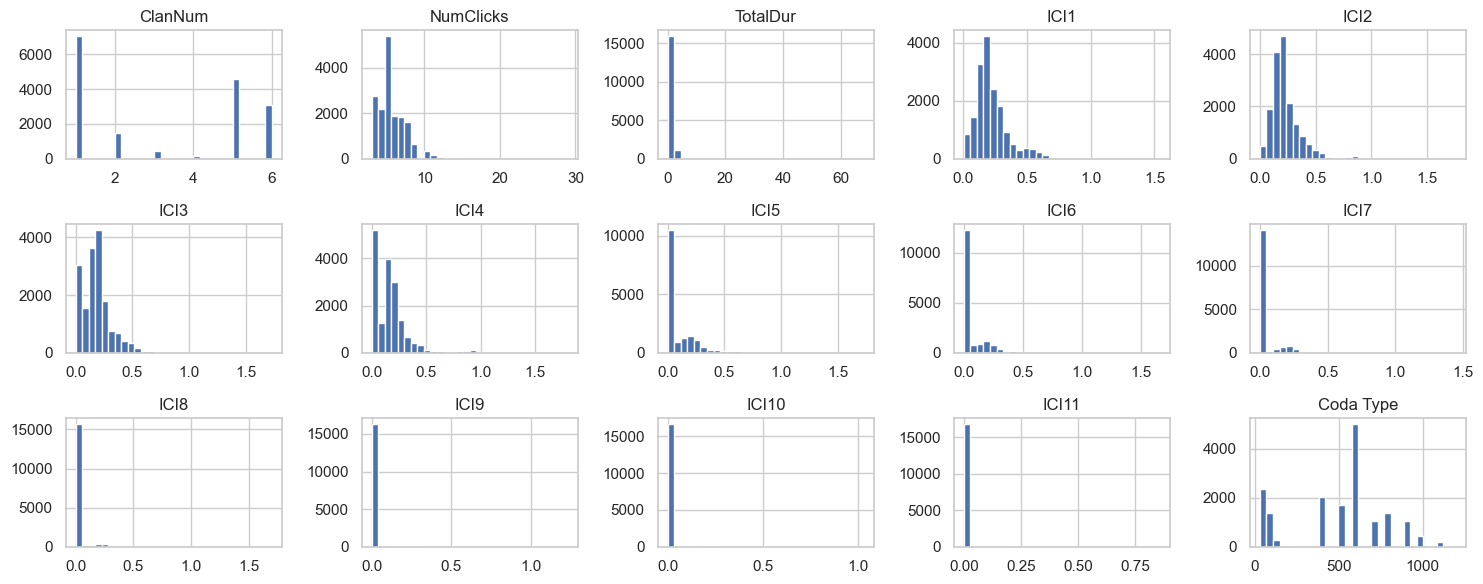

In [28]:
# Histograms for numerical columns
df[numerical_cols].hist(bins=30, figsize=(15, 6), layout=(3, len(numerical_cols)//3))
plt.tight_layout()
plt.show()

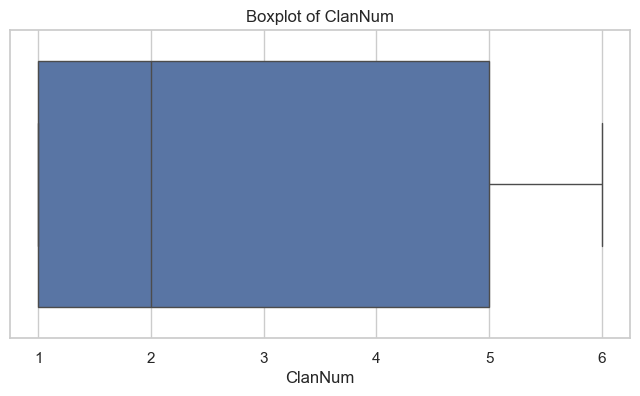

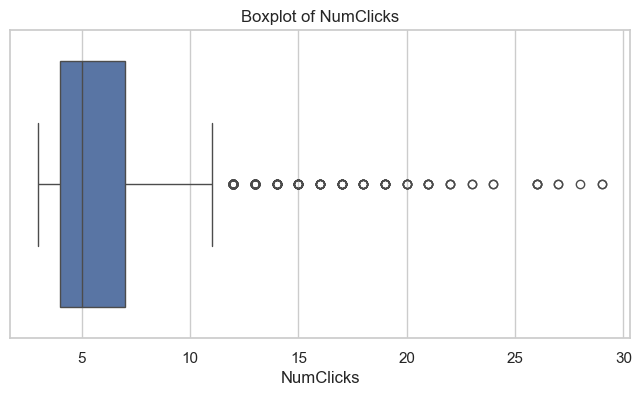

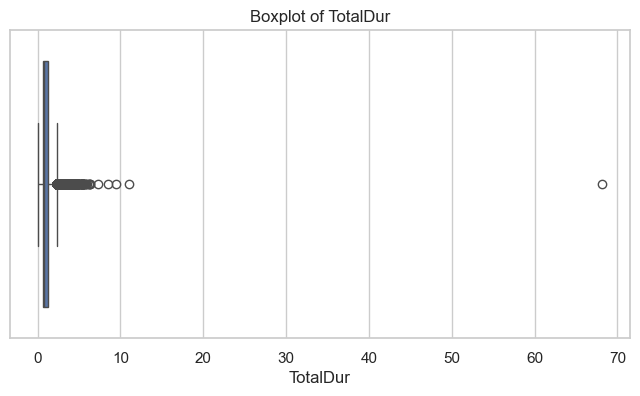

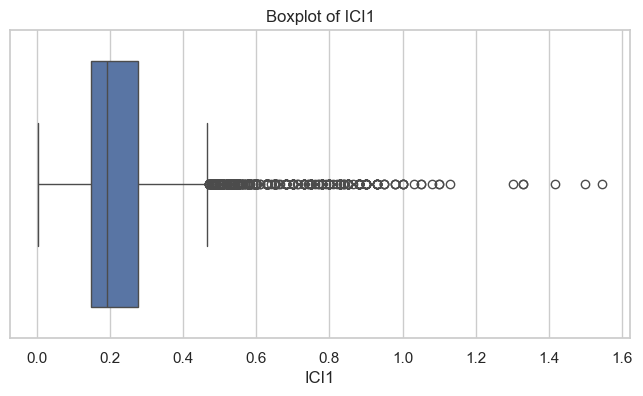

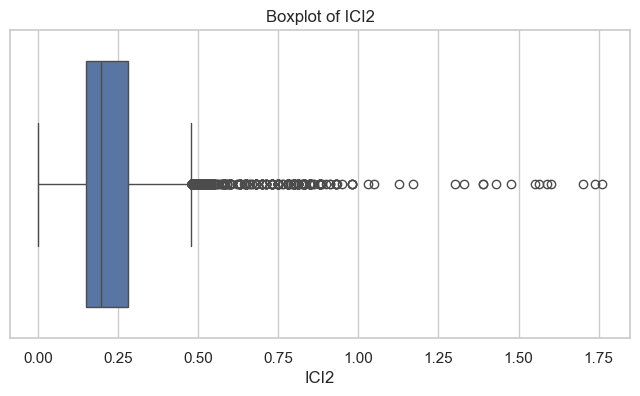

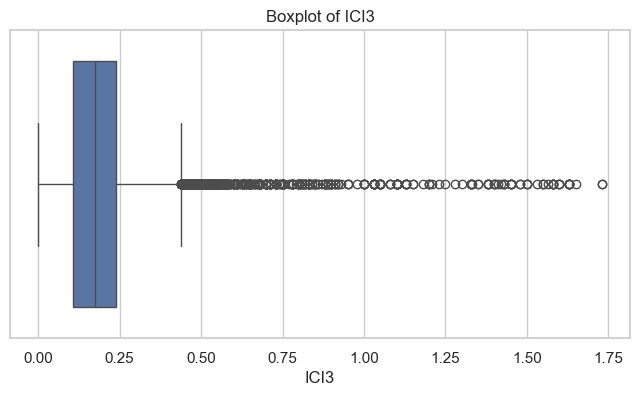

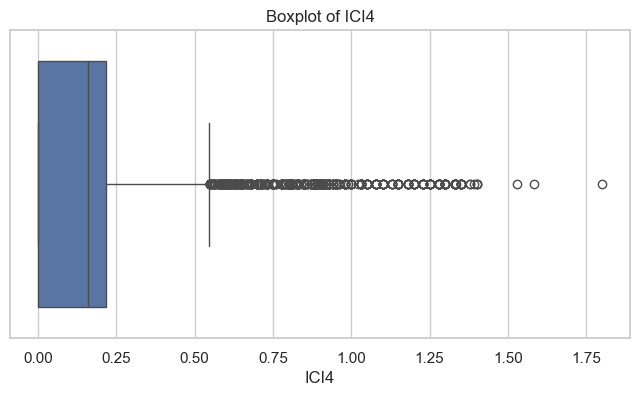

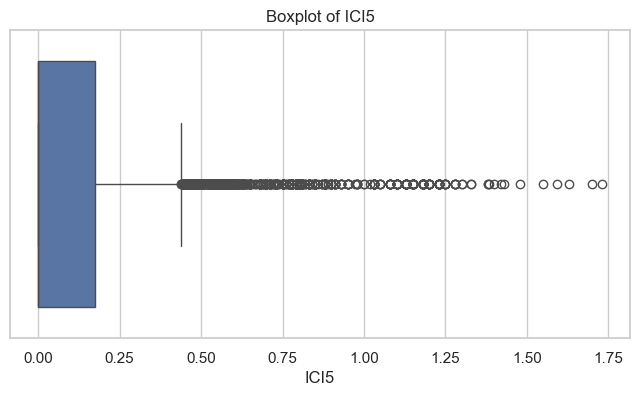

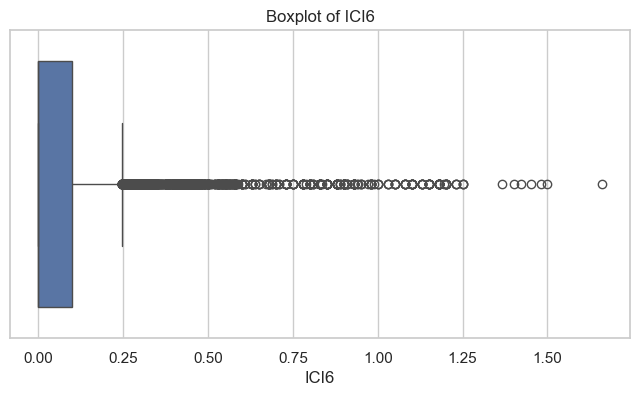

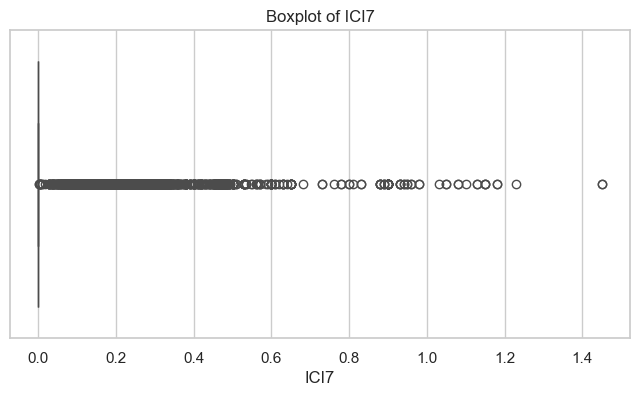

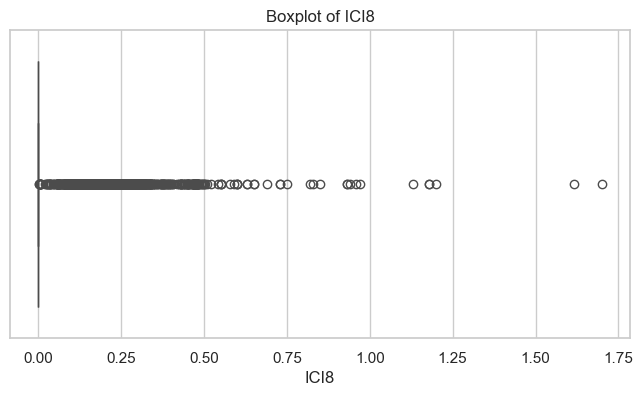

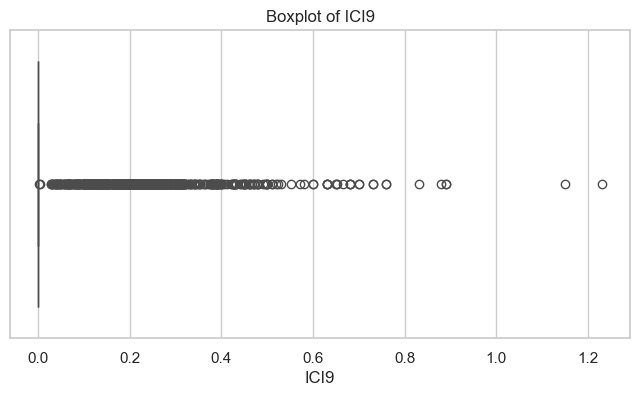

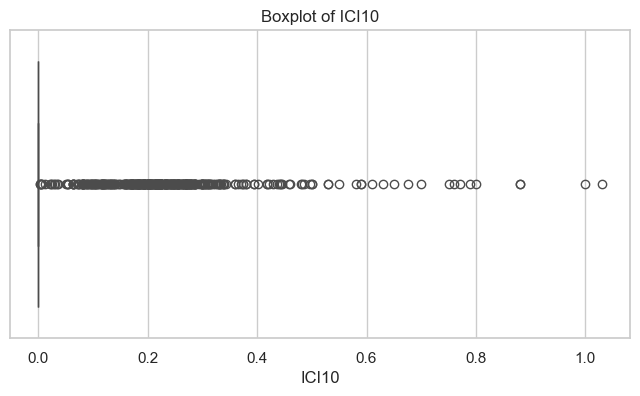

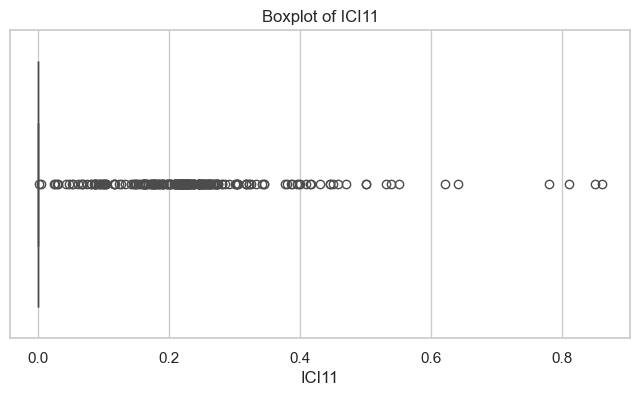

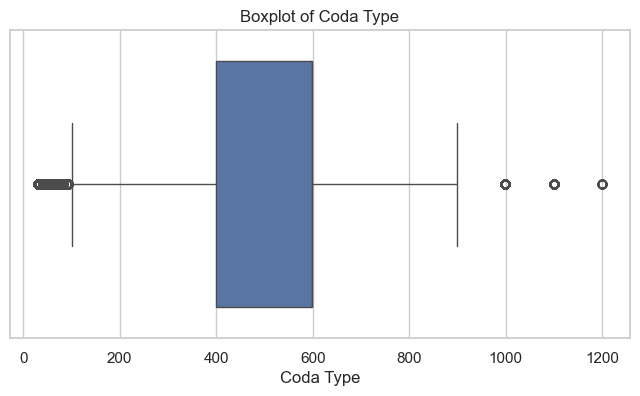

In [29]:
# Boxplots for numerical columns to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

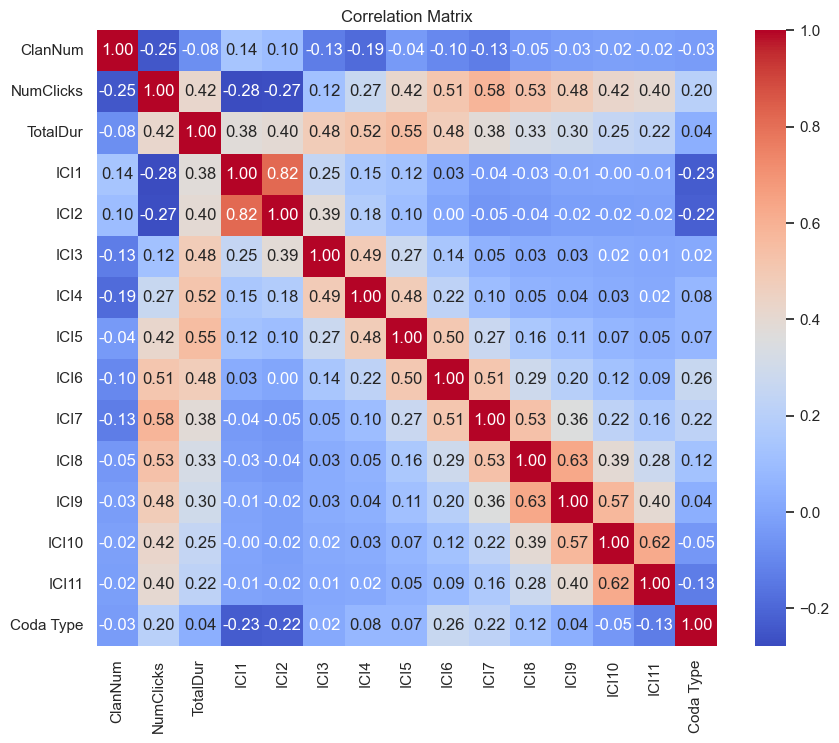

In [30]:
# Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

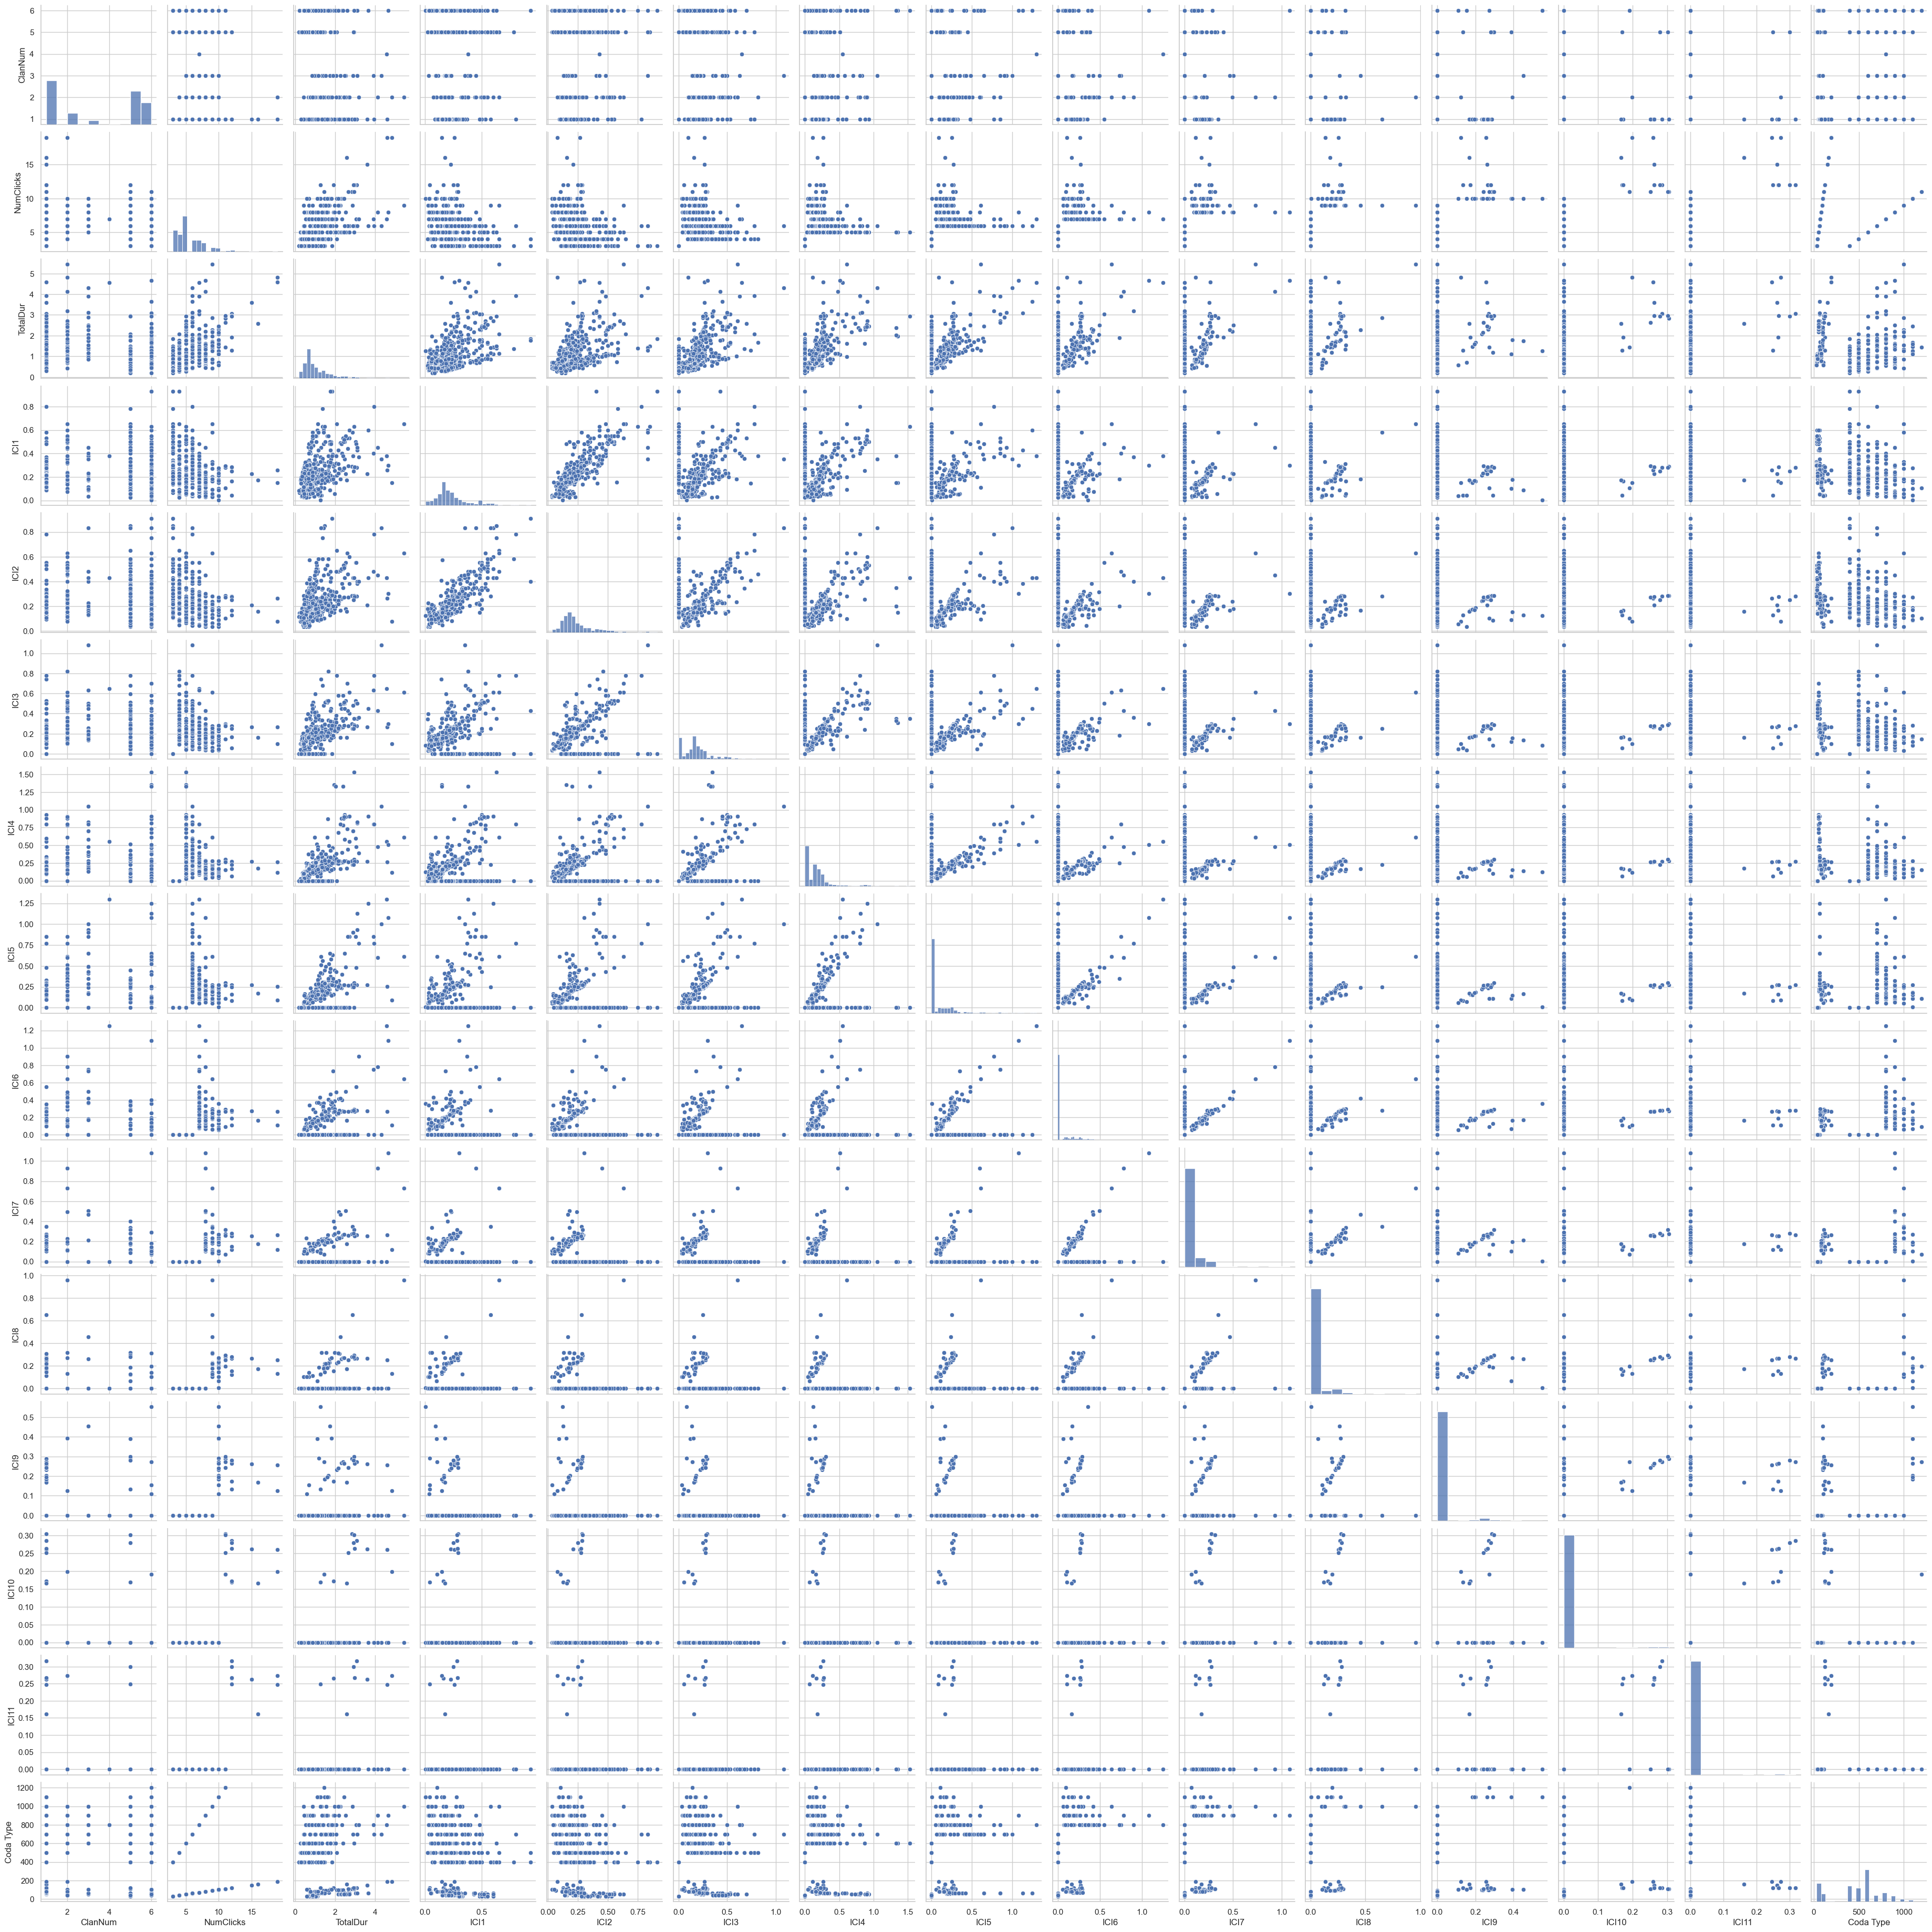

In [31]:
# Pairplot for numerical columns (sampled for large datasets)
sampled_df = df[numerical_cols].dropna().sample(n=500) if len(df) > 500 else df[numerical_cols].dropna()
sns.pairplot(sampled_df)
plt.show()

# Categorical Data Analysis


Categorical Columns: ['ClanName']

Value counts for ClanName:
 ClanName
Regular      6955
Short        4603
FourPlus     3083
PlusOne      1586
Caribbean     476
Tonga         152
Name: count, dtype: int64


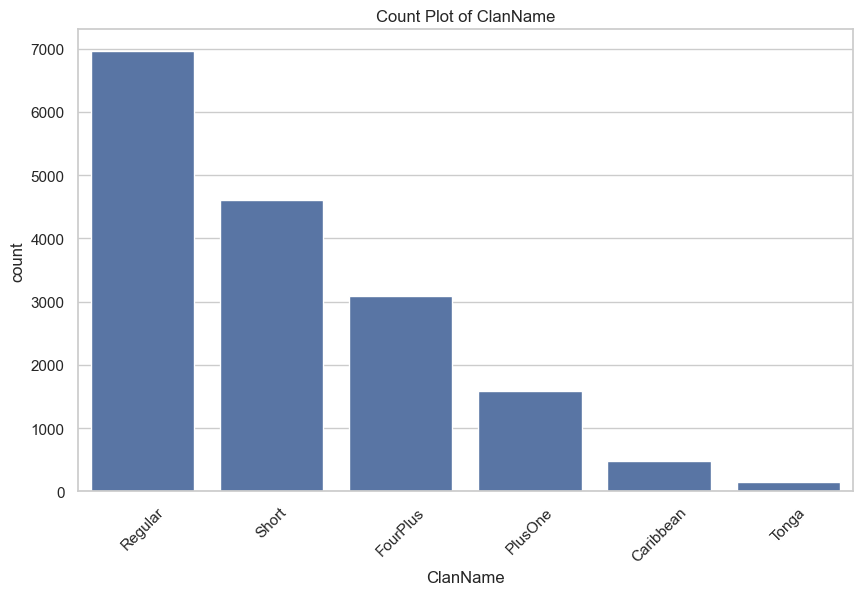

In [32]:
# Identify categorical columns
categorical_cols = df_with_date.select_dtypes(include=['object', 'category']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)

# Value counts for each categorical column
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

# Bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()

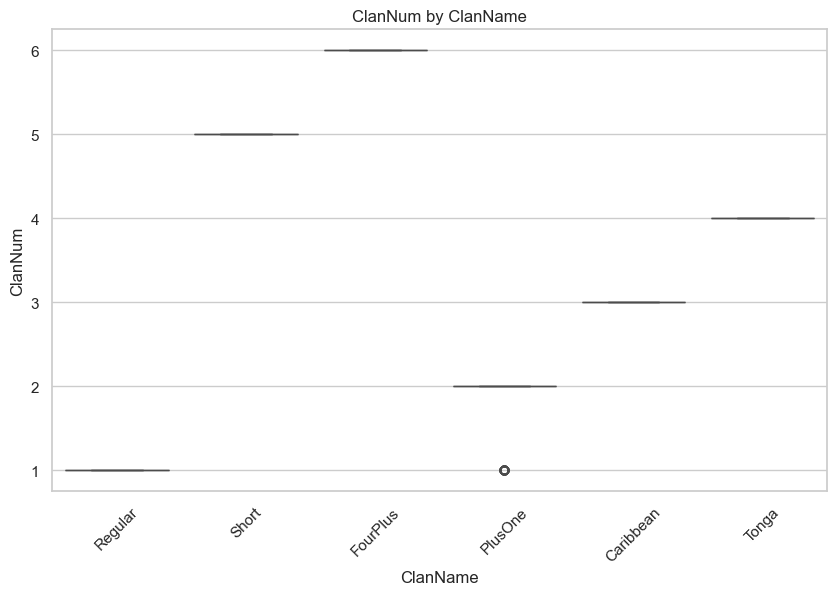

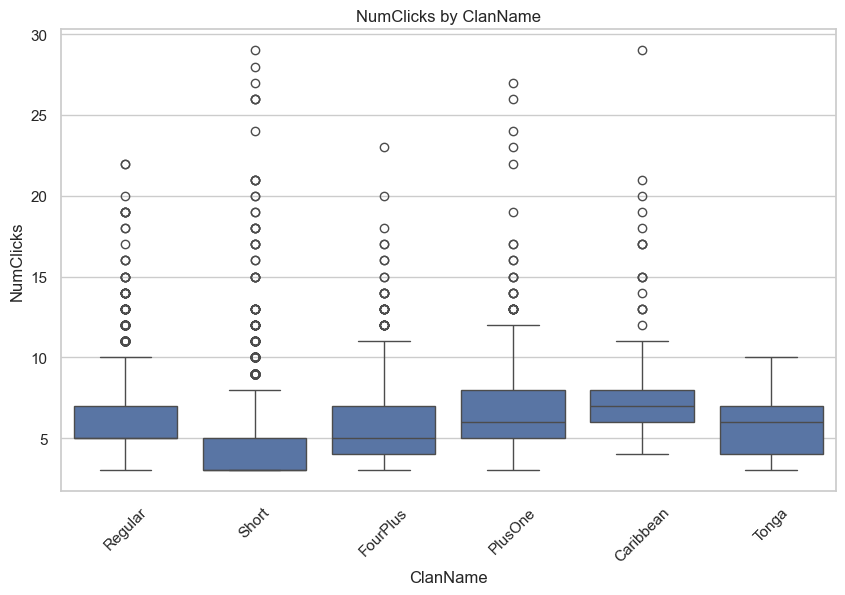

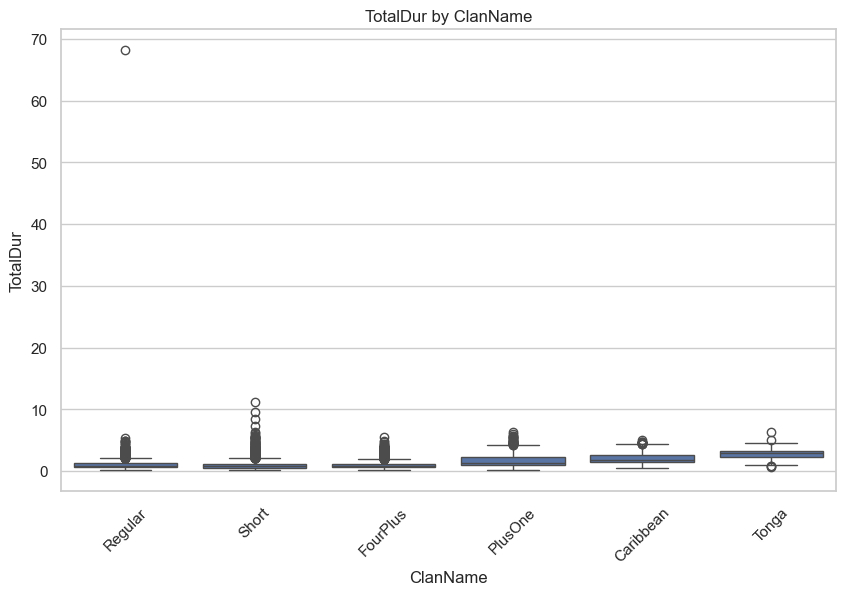

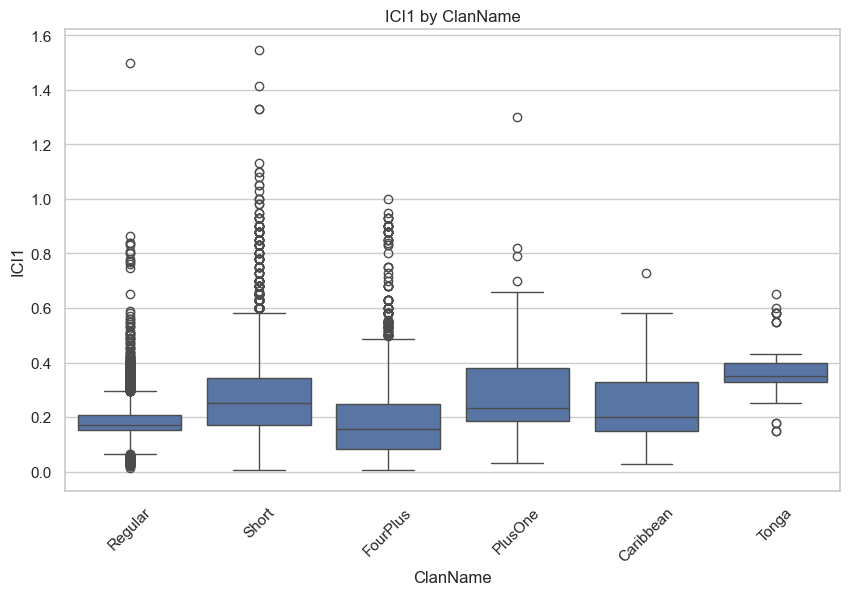

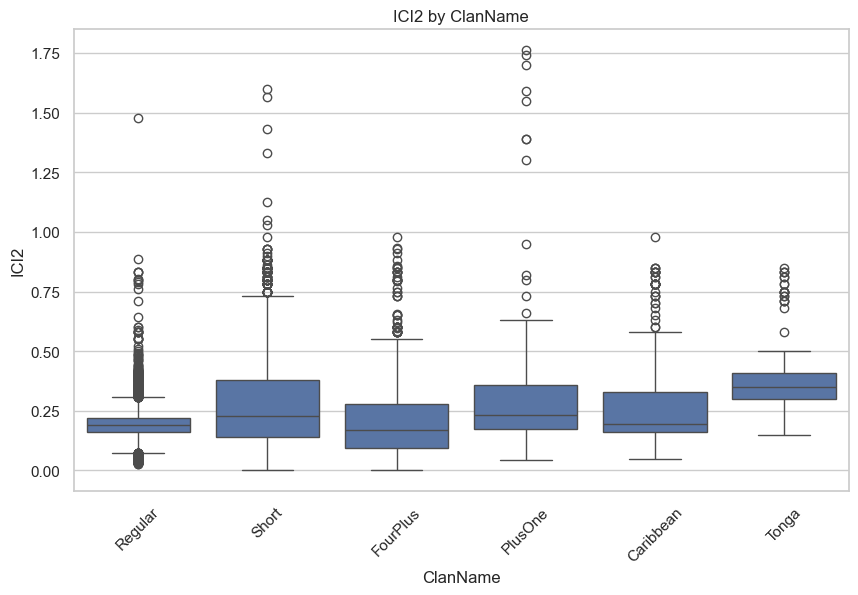

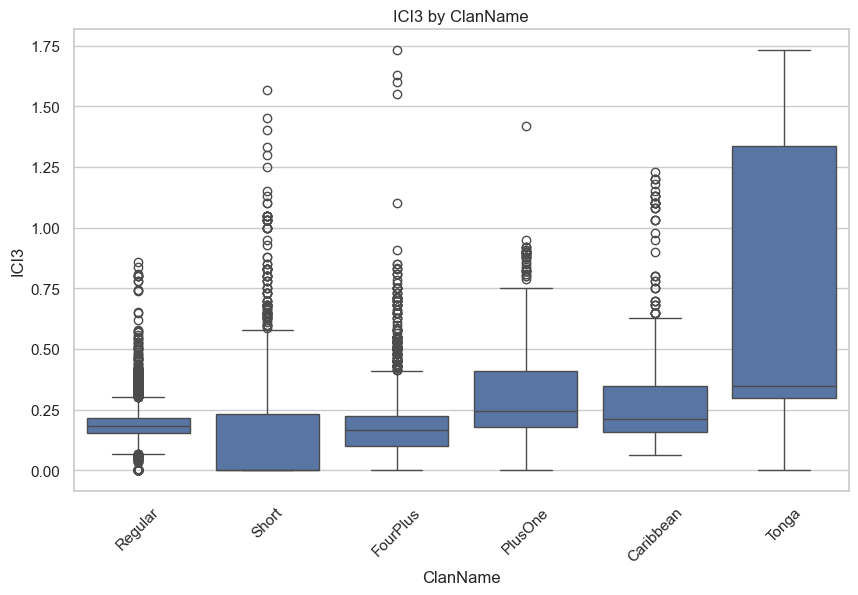

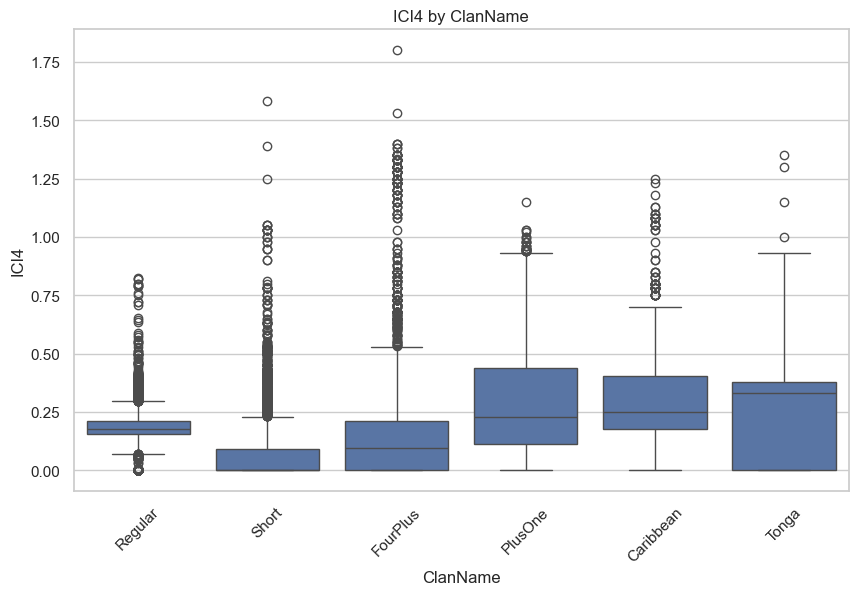

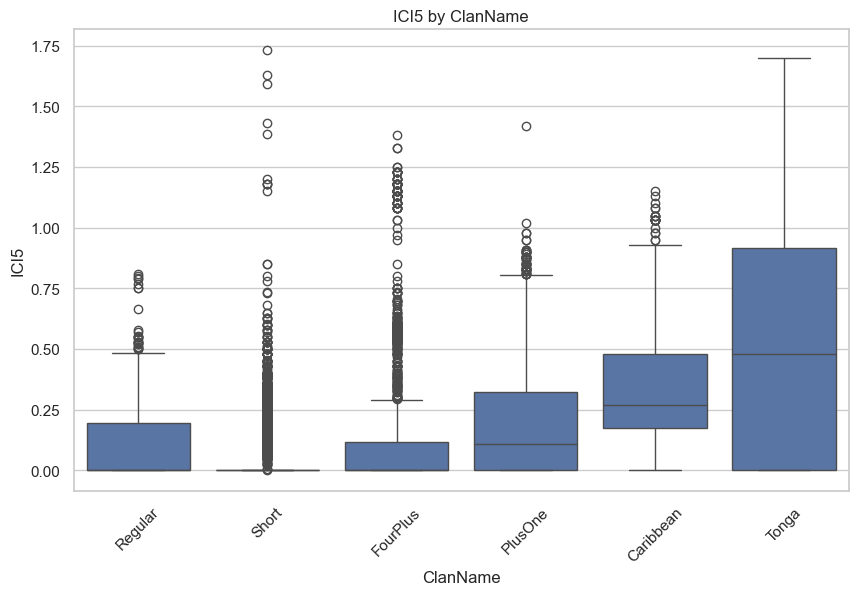

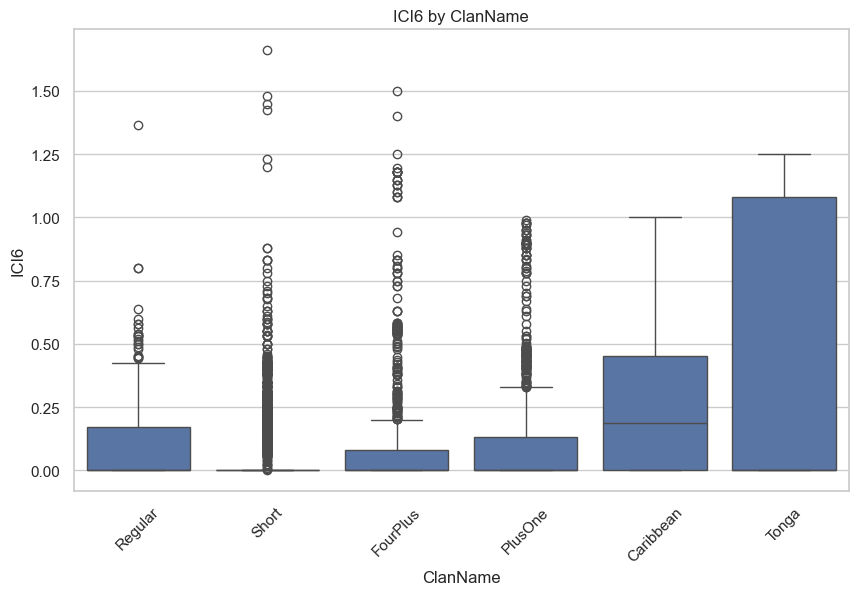

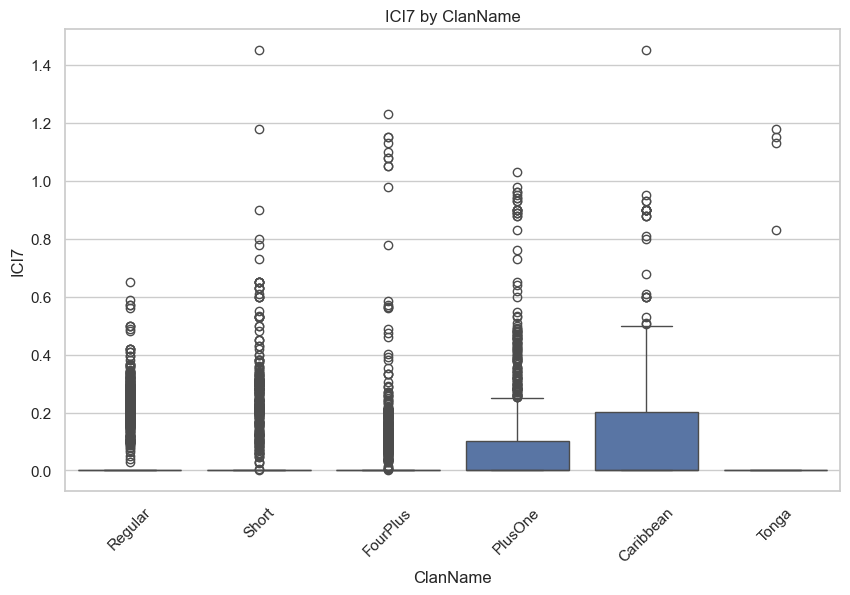

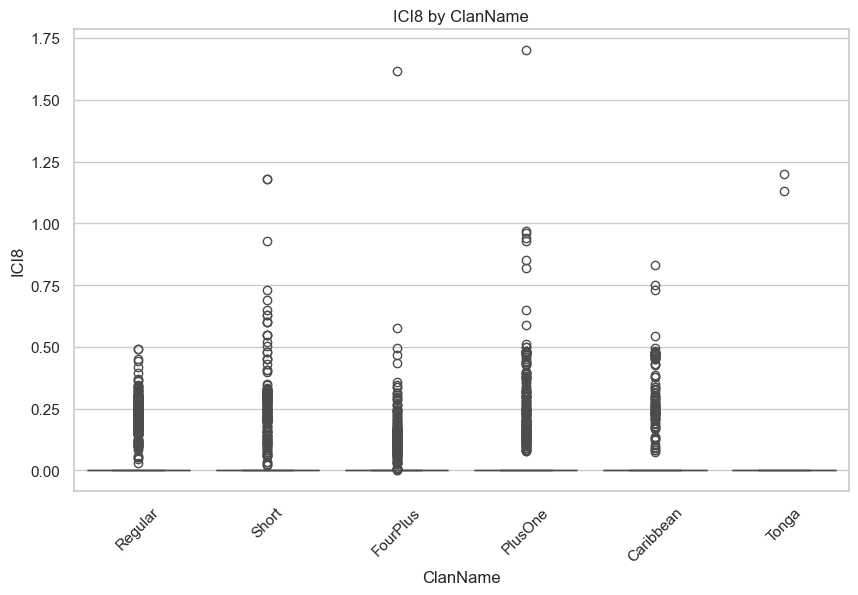

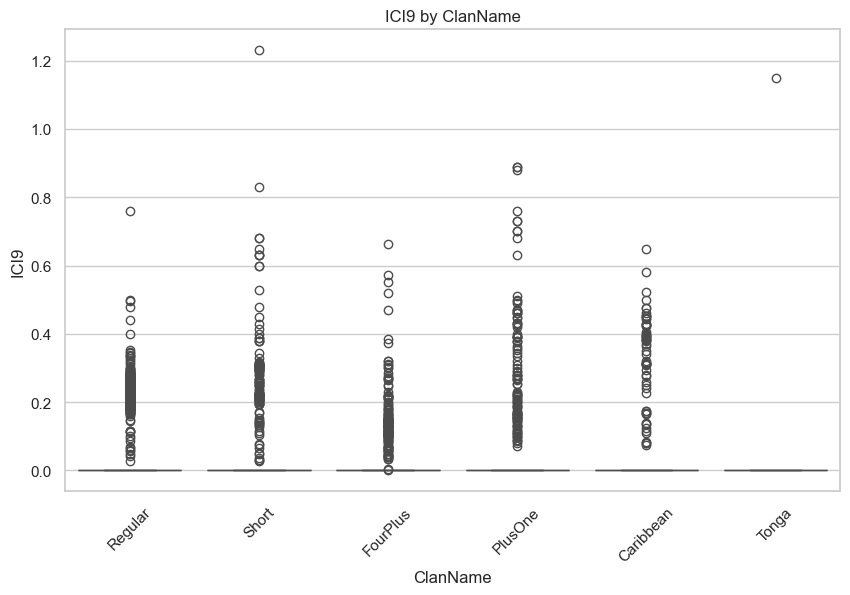

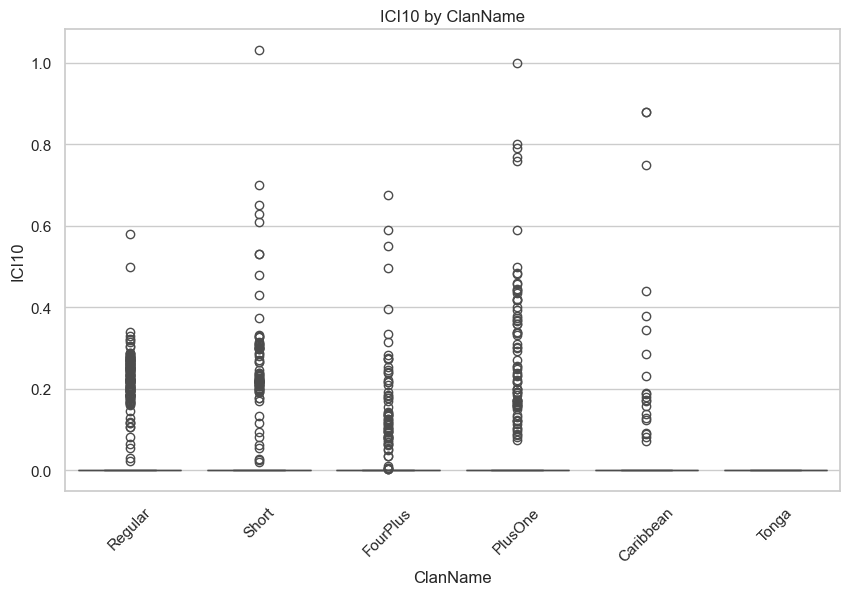

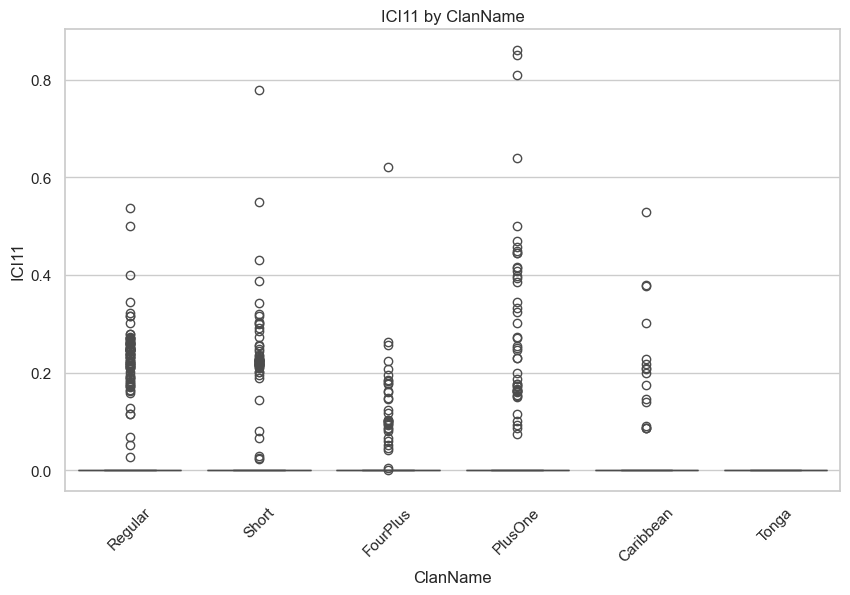

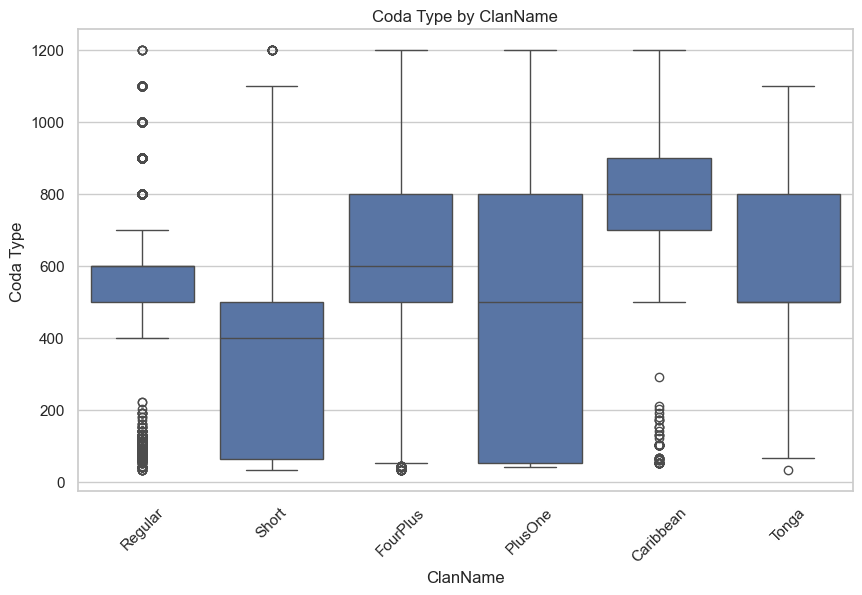

In [33]:
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()